In [69]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (17,6)
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
from IPython.display import Image,HTML
import matplotlib.ticker as ticker
import matplotlib.animation as animation
import bar_chart_race as bcr

In [70]:
df = pd.read_csv('artists.csv')
df.head()

,id,name,years,genre,nationality,bio,wikipedia,paintings
0,0,Amedeo Modigliani,1884 - 1920,Expressionism,Italian,Amedeo Clemente Modigliani (Italian pronunciat...,http://en.wikipedia.org/wiki/Amedeo_Modigliani,193
1,1,Vasiliy Kandinskiy,1866 - 1944,"Expressionism,Abstractionism",Russian,Wassily Wassilyevich Kandinsky (Russian: Васи́...,http://en.wikipedia.org/wiki/Wassily_Kandinsky,88
2,2,Diego Rivera,1886 - 1957,"Social Realism,Muralism",Mexican,Diego María de la Concepción Juan Nepomuceno E...,http://en.wikipedia.org/wiki/Diego_Rivera,70
3,3,Claude Monet,1840 - 1926,Impressionism,French,Oscar-Claude Monet (; French: [klod mɔnɛ]; 14 ...,http://en.wikipedia.org/wiki/Claude_Monet,73
4,4,Rene Magritte,1898 - 1967,"Surrealism,Impressionism",Belgian,René François Ghislain Magritte (French: [ʁəne...,http://en.wikipedia.org/wiki/René_Magritte,194


In [71]:
df.shape

(50, 8)

In [72]:
df['born']= df['years'].str[:4]
df['death']=df['years'].str[-4:]

In [73]:
df.head()

,id,name,years,genre,nationality,bio,wikipedia,paintings,born,death
0,0,Amedeo Modigliani,1884 - 1920,Expressionism,Italian,Amedeo Clemente Modigliani (Italian pronunciat...,http://en.wikipedia.org/wiki/Amedeo_Modigliani,193,1884,1920
1,1,Vasiliy Kandinskiy,1866 - 1944,"Expressionism,Abstractionism",Russian,Wassily Wassilyevich Kandinsky (Russian: Васи́...,http://en.wikipedia.org/wiki/Wassily_Kandinsky,88,1866,1944
2,2,Diego Rivera,1886 - 1957,"Social Realism,Muralism",Mexican,Diego María de la Concepción Juan Nepomuceno E...,http://en.wikipedia.org/wiki/Diego_Rivera,70,1886,1957
3,3,Claude Monet,1840 - 1926,Impressionism,French,Oscar-Claude Monet (; French: [klod mɔnɛ]; 14 ...,http://en.wikipedia.org/wiki/Claude_Monet,73,1840,1926
4,4,Rene Magritte,1898 - 1967,"Surrealism,Impressionism",Belgian,René François Ghislain Magritte (French: [ʁəne...,http://en.wikipedia.org/wiki/René_Magritte,194,1898,1967


In [74]:
df['century']=df['born'].str[:2]
df['century'] = df['century'].astype(str).astype(int)
df['century'] = df['century']+1

In [75]:
df.head()

,id,name,years,genre,nationality,bio,wikipedia,paintings,born,death,century
0,0,Amedeo Modigliani,1884 - 1920,Expressionism,Italian,Amedeo Clemente Modigliani (Italian pronunciat...,http://en.wikipedia.org/wiki/Amedeo_Modigliani,193,1884,1920,19
1,1,Vasiliy Kandinskiy,1866 - 1944,"Expressionism,Abstractionism",Russian,Wassily Wassilyevich Kandinsky (Russian: Васи́...,http://en.wikipedia.org/wiki/Wassily_Kandinsky,88,1866,1944,19
2,2,Diego Rivera,1886 - 1957,"Social Realism,Muralism",Mexican,Diego María de la Concepción Juan Nepomuceno E...,http://en.wikipedia.org/wiki/Diego_Rivera,70,1886,1957,19
3,3,Claude Monet,1840 - 1926,Impressionism,French,Oscar-Claude Monet (; French: [klod mɔnɛ]; 14 ...,http://en.wikipedia.org/wiki/Claude_Monet,73,1840,1926,19
4,4,Rene Magritte,1898 - 1967,"Surrealism,Impressionism",Belgian,René François Ghislain Magritte (French: [ʁəne...,http://en.wikipedia.org/wiki/René_Magritte,194,1898,1967,19


Text(0.5, 0, 'name of the painter')

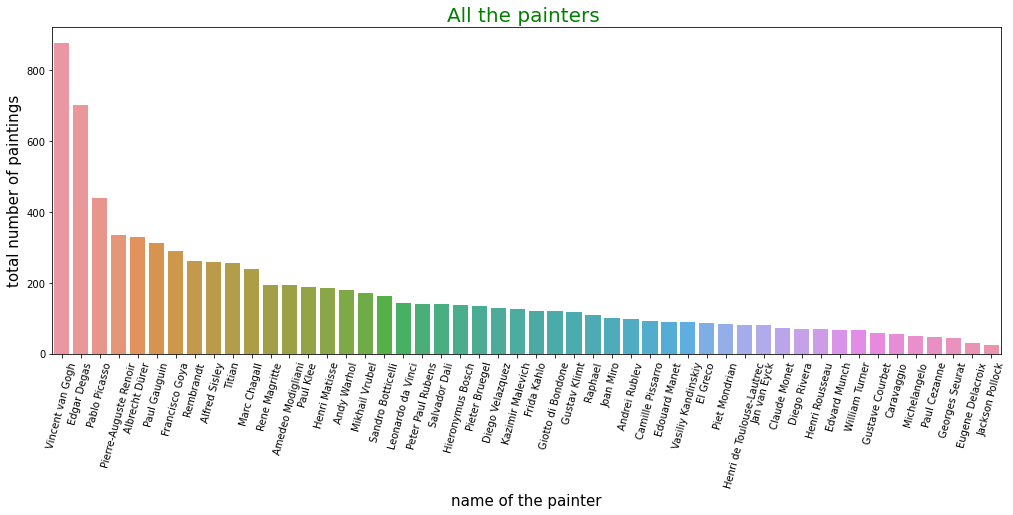

In [76]:
bar = sns.barplot(x = 'name', y= 'paintings', data = df[['name', 'paintings']].sort_values( by = 'paintings' , ascending = False))

bar.set_xticklabels(bar.get_xticklabels(), rotation=75)
plt.title('All the painters ' , fontsize=20, color="green")
plt.ylabel('total number of paintings', fontsize=15)
plt.xlabel('name of the painter', fontsize=15)

Text(0.5, 0, 'name of the painter')

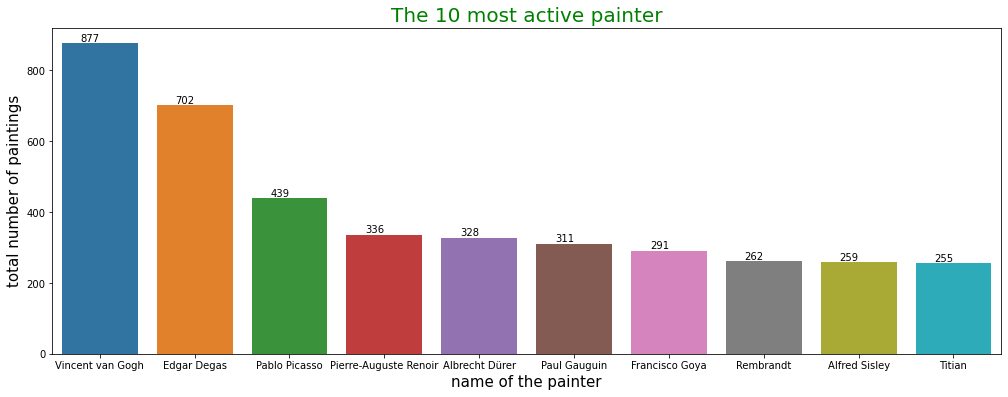

In [77]:
barc = sns.barplot(x = 'name', y= 'paintings', data = df[['name', 'paintings']].sort_values( by = 'paintings' , ascending = False).head(10))

for p in barc.patches:
        barc.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')

plt.title('The 10 most active painter' , fontsize=20, color="green")
plt.ylabel('total number of paintings', fontsize=15)
plt.xlabel('name of the painter', fontsize=15)

In [78]:
data = df[['genre', 'paintings','name']].sort_values( by = 'paintings' , ascending = False).head(10)
data

,genre,paintings,name
8,Post-Impressionism,877,Vincent van Gogh
30,Impressionism,702,Edgar Degas
13,Cubism,439,Pablo Picasso
15,Impressionism,336,Pierre-Auguste Renoir
19,Northern Renaissance,328,Albrecht Dürer
46,"Symbolism,Post-Impressionism",311,Paul Gauguin
16,Romanticism,291,Francisco Goya
31,Baroque,262,Rembrandt
20,Impressionism,259,Alfred Sisley
32,"High Renaissance,Mannerism",255,Titian


Text(0, 0.5, '')

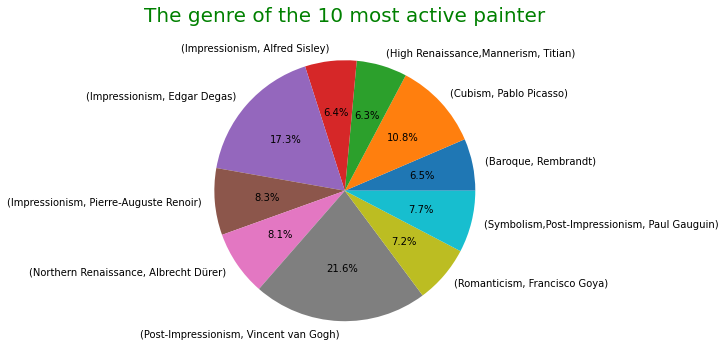

In [79]:
data.groupby(['genre','name'])['paintings'].sum().plot.pie(autopct='%1.1f%%')
plt.title('The genre of the 10 most active painter' , fontsize=20, color="green")
plt.ylabel('')

Text(0.5, 0.98, 'Total number of masterpieces by nationality ')

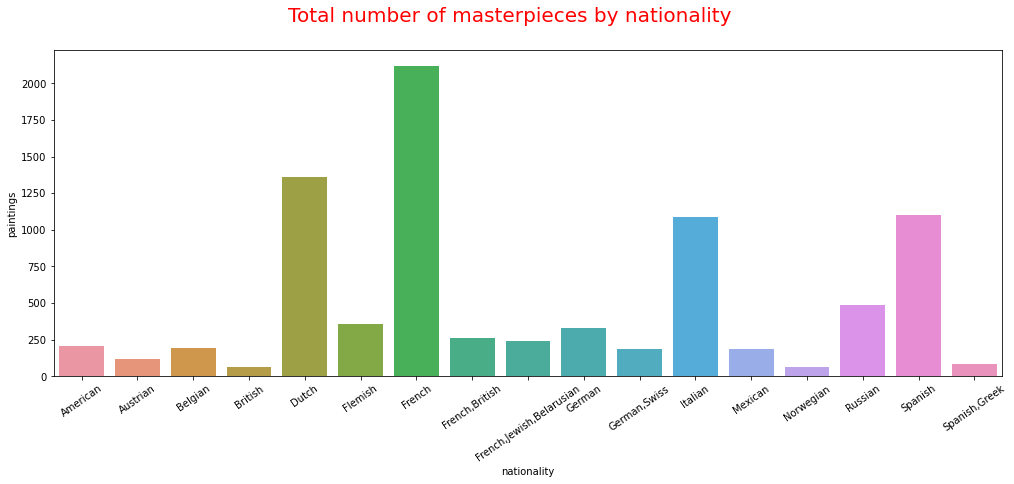

In [80]:
nat =sns.barplot(x = 'nationality', y= 'paintings',data = pd.DataFrame(df.groupby(['nationality'])['paintings'].sum().reset_index()))
nat.set_xticklabels(nat.get_xticklabels(), rotation=35)
plt.suptitle('Total number of masterpieces by nationality ', fontsize=20, color="red")

In [81]:
df.groupby(['genre', 'century'])['paintings'].sum().sort_values(ascending= False)

genre                                    century
Impressionism                            19         1370
Post-Impressionism                       19         1048
Northern Renaissance                     15          465
Cubism                                   19          439
Romanticism                              18          388
Baroque                                  16          324
Symbolism,Post-Impressionism             19          311
Primitivism                              19          309
High Renaissance                         15          301
Impressionism,Post-Impressionism         19          277
Baroque                                  17          262
High Renaissance,Mannerism               15          255
Surrealism,Impressionism                 19          194
Expressionism                            19          193
Expressionism,Abstractionism,Surrealism  19          188
Pop Art                                  20          181
Symbolism                              

Text(0.5, 0, 'genre')

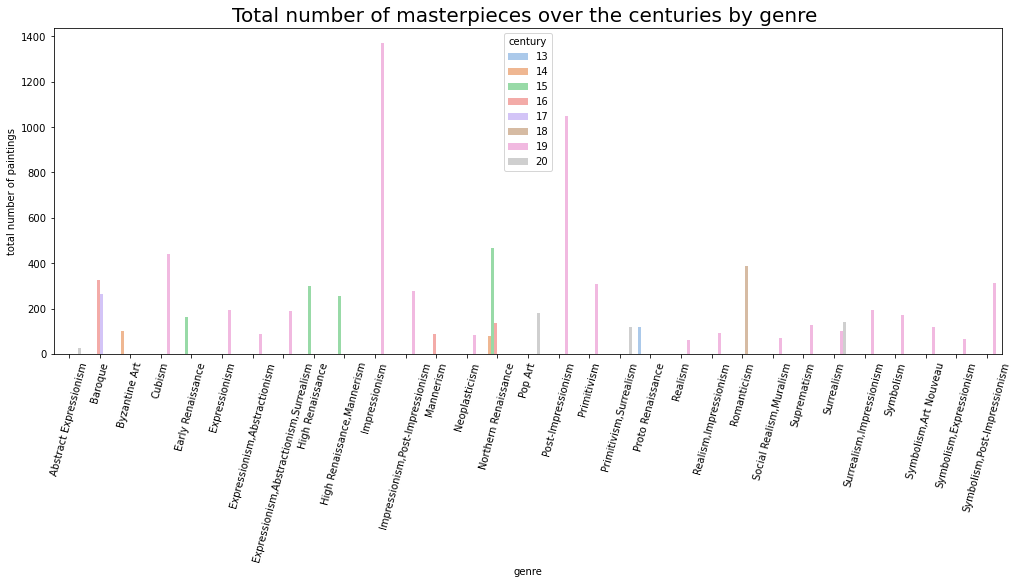

In [90]:
genre = sns.barplot( x = 'genre', y = 'paintings', hue = 'century', data = pd.DataFrame(df.groupby(['genre', 'century'])['paintings'].sum().reset_index()) , palette ='pastel')
genre.set_xticklabels(genre.get_xticklabels(), rotation=75)
plt.title("Total number of masterpieces over the centuries by genre " , fontsize=20)
plt.ylabel('total number of paintings')
plt.xlabel('genre')

In [83]:
df3 =pd.DataFrame(df.groupby(['genre', 'century'])['paintings'].sum()).reset_index()
df3.head()

,genre,century,paintings
0,Abstract Expressionism,20,24
1,Baroque,16,324
2,Baroque,17,262
3,Byzantine Art,14,99
4,Cubism,19,439


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 <a list of 19 Text major ticklabel objects>)

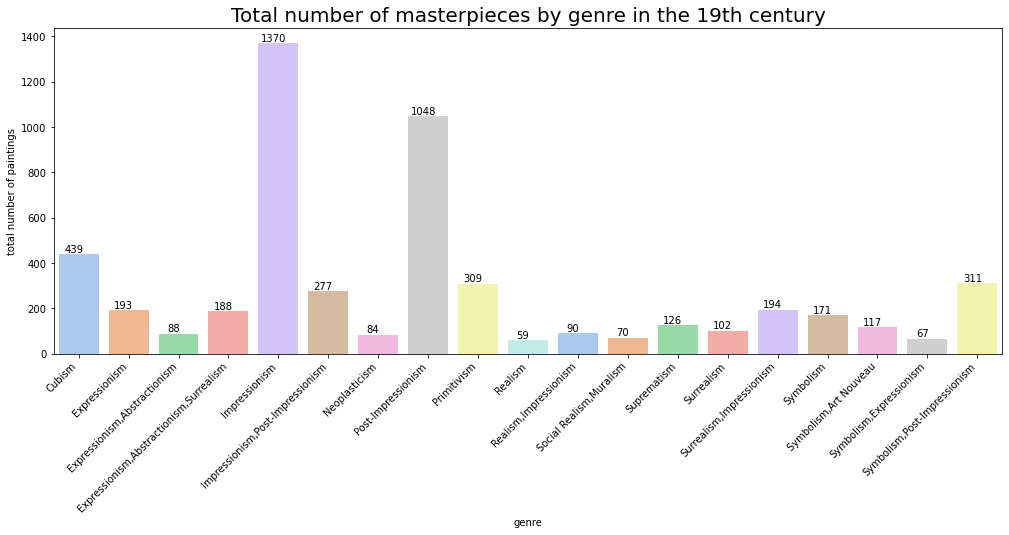

In [89]:
century_19 = sns.barplot( x = 'genre', y = 'paintings', data = df3[df3['century']==19] , palette ='pastel')

for p in century_19.patches:
        century_19.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')
plt.title("Total number of masterpieces by genre in the 19th century" , fontsize=20)
plt.ylabel('total number of paintings')
plt.xlabel('genre')
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light'  
)

Text(0, 0.5, '')

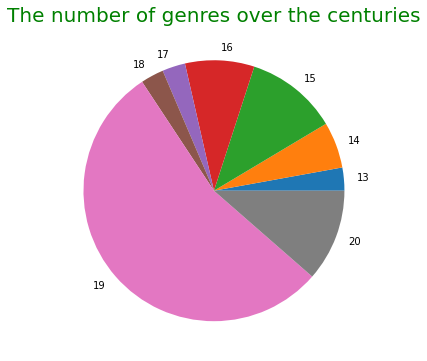

In [85]:
df3.groupby(['century'])['genre'].count().plot.pie()
plt.title('The number of genres over the centuries' , fontsize=20, color="green")
plt.ylabel('')
plt.ylabel('')

Text(0.5, 0, 'nationality')

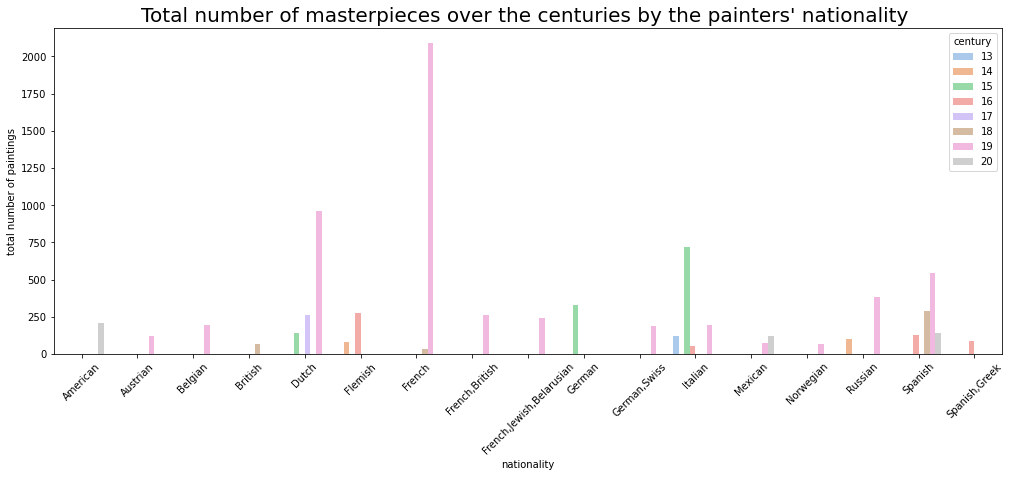

In [86]:
chart = sns.barplot( x = 'nationality', y = 'paintings', hue = 'century', data = pd.DataFrame(df.groupby(['nationality', 'century'])['paintings'].sum().reset_index()) , palette ='pastel')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
plt.title("Total number of masterpieces over the centuries by the painters' nationality " , fontsize=20)
plt.ylabel('total number of paintings')
plt.xlabel('nationality')

In [87]:
df2 = pd.DataFrame(df.groupby(['nationality', 'century'])['paintings'].sum())
df2.reset_index(inplace=True) 
df2.head()

,nationality,century,paintings
0,American,20,205
1,Austrian,19,117
2,Belgian,19,194
3,British,18,66
4,Dutch,15,137


In [88]:
# running bars (video)

In [ ]:
df_values, df_ranks = bcr.prepare_long_data(df2, index='century', columns='nationality',
                                            values='paintings', steps_per_period=1,
                                            orientation='h', sort='desc')

def period_summary(values, ranks):
    top2 = values.nlargest(2)
    leader = top2.index[0]
    lead = top2.iloc[0] - top2.iloc[1]
    s = f'{leader} by {lead:.0f}'
    return {'s': s, 'x': .95, 'y': .07, 'ha': 'right', 'size': 8}

bcr.bar_chart_race(df_values, period_length=2000,
                   fixed_max=True, fixed_order=True, n_bars=10,
                   figsize=(5, 3), period_fmt='century {x:,.0f}',
                   title="Total number of masterpieces over the centuries by the painters' nationality "
                  )

In [26]:
df.head()

,id,name,years,genre,nationality,bio,wikipedia,paintings,born,death,century
0,0,Amedeo Modigliani,1884 - 1920,Expressionism,Italian,Amedeo Clemente Modigliani (Italian pronunciat...,http://en.wikipedia.org/wiki/Amedeo_Modigliani,193,1884,1920,17
1,1,Vasiliy Kandinskiy,1866 - 1944,"Expressionism,Abstractionism",Russian,Wassily Wassilyevich Kandinsky (Russian: Васи́...,http://en.wikipedia.org/wiki/Wassily_Kandinsky,88,1866,1944,17
2,2,Diego Rivera,1886 - 1957,"Social Realism,Muralism",Mexican,Diego María de la Concepción Juan Nepomuceno E...,http://en.wikipedia.org/wiki/Diego_Rivera,70,1886,1957,17
3,3,Claude Monet,1840 - 1926,Impressionism,French,Oscar-Claude Monet (; French: [klod mɔnɛ]; 14 ...,http://en.wikipedia.org/wiki/Claude_Monet,73,1840,1926,17
4,4,Rene Magritte,1898 - 1967,"Surrealism,Impressionism",Belgian,René François Ghislain Magritte (French: [ʁəne...,http://en.wikipedia.org/wiki/René_Magritte,194,1898,1967,17


In [27]:
name_list=df['name']

In [18]:
name_dict=Counter(name_list)

In [19]:
wordcloud= WordCloud(colormap = 'hsv').generate_from_frequencies(name_dict)

(-0.5, 399.5, 199.5, -0.5)

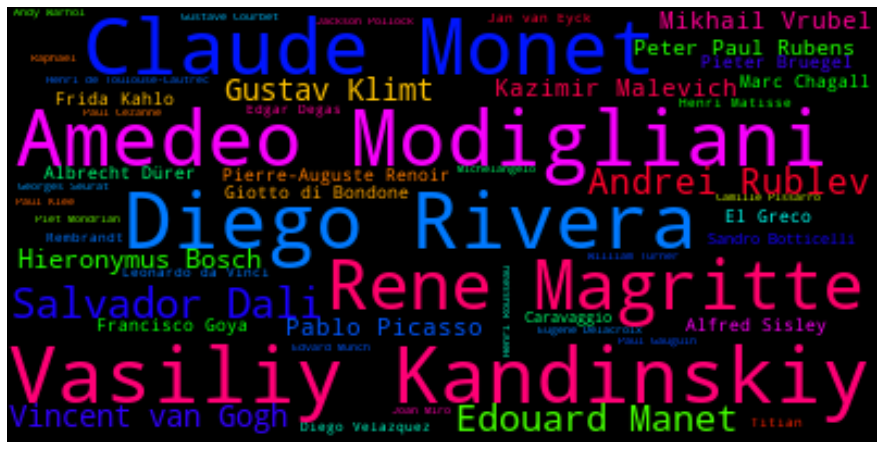

In [20]:
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")

(-0.5, 399.5, 199.5, -0.5)

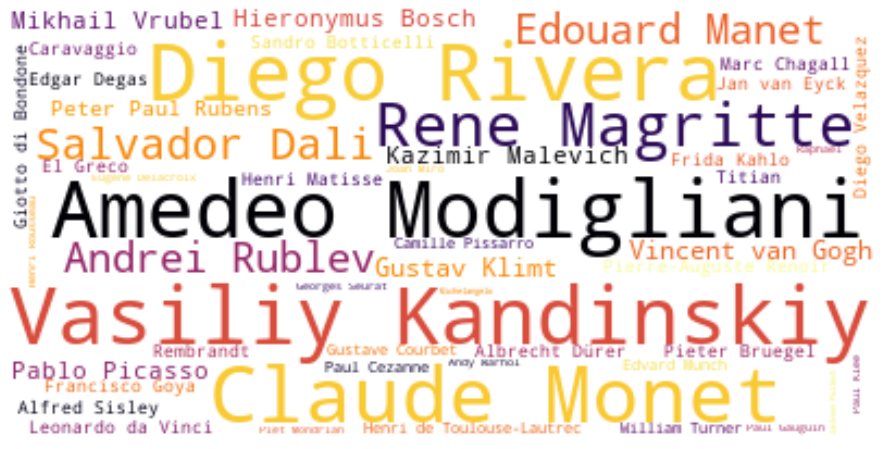

In [21]:
wordcloud= WordCloud(background_color='white', colormap=plt.cm.inferno).generate_from_frequencies(name_dict)
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")